In [1]:
# Susan Omondi
# WTF/2025/8557
# susanomondi25@outlook.com

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/HR_comma_sep 1.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
# Those that left
df['left'].value_counts()

,count
left,
0,11428
1,3571


In [7]:

# Satisfaction Level and Retention
df.groupby('left')['satisfaction_level'].mean()


,satisfaction_level
left,
0,0.666810
1,0.440098


In [6]:
# Average monthly hours
df.groupby('left')['average_montly_hours'].mean()


,average_montly_hours
left,
0,199.060203
1,207.419210


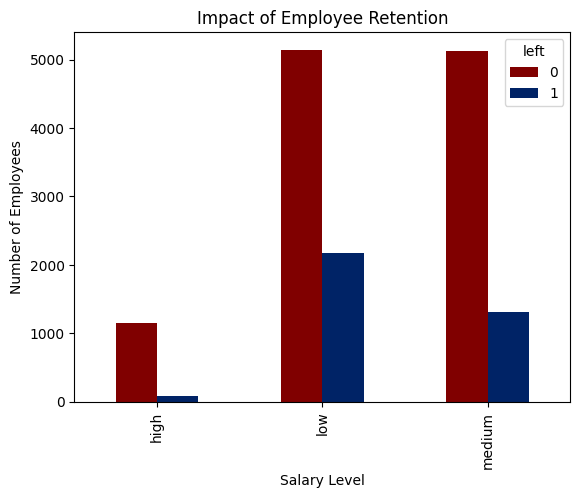

In [50]:
# 2.Plot bar charts showing impact of employee salaries on retention
import matplotlib.pyplot as plt

pd.crosstab(df.salary, df.left).plot( kind='bar', color=['#800000', '#002366'])
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.title("Impact of Employee Retention")
plt.show()


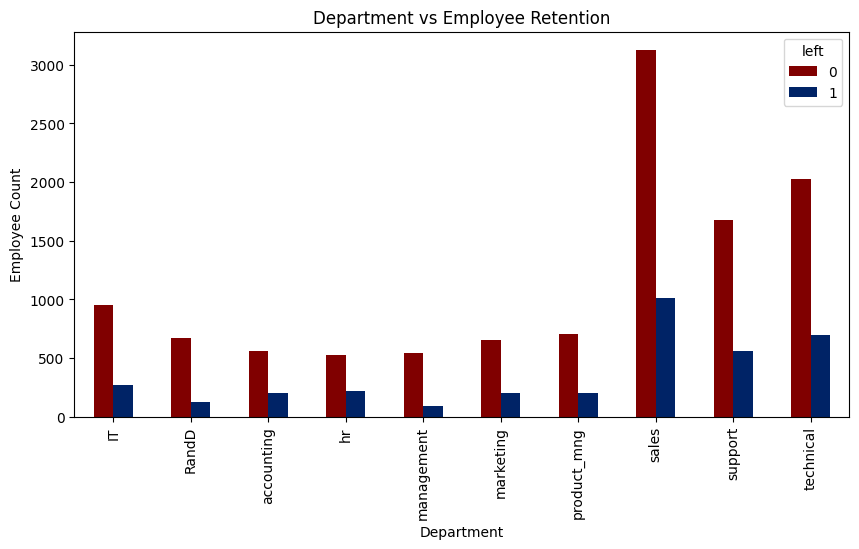

In [51]:
#3. Plot bar charts showing corelation between department and employee retention

pd.crosstab(df.Department, df.left).plot(kind='bar',  color=['#800000', '#002366'], figsize=(10,5))
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.title("Department vs Employee Retention")
plt.show()

In [31]:
# 4. Now build logistic regression model using variables that were narrowed down in step
# Converting logic
df_encoded = pd.get_dummies(df, columns=['salary','Department'], drop_first=True)
df_encoded.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,True,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,False,True,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,False,True,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,True,False,False,False,False,False,False,False,True,False,False


In [30]:
 X = df_encoded[ ['satisfaction_level', 'average_montly_hours', 'promotion_last_5years']]
 y = df_encoded['left']
print(X.shape)
print(y.shape)

(14999, 3)
(14999,)


In [34]:
# Trainig
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)


       satisfaction_level  average_montly_hours  promotion_last_5years
9838                 1.00                   188                      0
7689                 0.16                   196                      0
6557                 0.80                   175                      0
6872                 0.66                   112                      0
820                  0.11                   284                      0
...                   ...                   ...                    ...
5191                 0.52                   246                      0
13418                0.49                   233                      0
5390                 0.66                   249                      0
860                  0.79                   218                      0
7270                 0.98                   219                      0

[11999 rows x 3 columns]
       satisfaction_level  average_montly_hours  promotion_last_5years
6723                 0.65                   226    

In [35]:
# Training the logistic model regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [36]:
# Measuring the accuracy
model.score(X_test, y_test)


0.757